In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import ode as ode
from matplotlib import cm
from itertools import product


# Draw electric field lines due to point charges

In [2]:
class charge:
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos


In [3]:
def E_point_charge(q, a, x, y):
    return q * (x - a[0]) / ((x - a[0]) ** 2 + (y - a[1]) ** 2) ** (1.5), q * (
        y - a[1]
    ) / ((x - a[0]) ** 2 + (y - a[1]) ** 2) ** (1.5)


def E_total(x, y, charges):
    Ex, Ey = 0, 0
    for C in charges:
        E = E_point_charge(C.q, C.pos, x, y)
        Ex = Ex + E[0]
        Ey = Ey + E[1]
    return [Ex, Ey]


def E_dir(t, y, charges):
    Ex, Ey = E_total(y[0], y[1], charges)
    n = np.sqrt(Ex**2 + Ey * Ey)
    return [Ex / n, Ey / n]


In [4]:
def V_point_charge(q, a, x, y):
    return q / ((x - a[0]) ** 2 + (y - a[1]) ** 2) ** (0.5)


def V_total(x, y, charges):
    V = 0
    for C in charges:
        Vp = V_point_charge(C.q, C.pos, x, y)
        V = V + Vp
    return V


In [8]:
# charges and positions
charges = [
    charge(-2, [-2, 0]),
    charge(-2, [2, 0]),
]

In [9]:
# calculate field lines
x0, x1 = -4, 4
y0, y1 = -4, 4
R = 0.01
# loop over all charges
xs, ys = [], []
for C in charges:
    # plot field lines starting in current charge
    dt = 0.8 * R
    if C.q < 0:
        dt = -dt
    # loop over field lines starting in different directions
    # around current charge
    for alpha in np.linspace(0, 2 * np.pi * 15 / 16, 16):
        r = ode(E_dir)
        r.set_integrator("vode")
        r.set_f_params(charges)
        x = [C.pos[0] + np.cos(alpha) * R]
        y = [C.pos[1] + np.sin(alpha) * R]
        r.set_initial_value([x[0], y[0]], 0)
        while r.successful():
            r.integrate(r.t + dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge = False
            # check if field line left drwaing area or ends in some charge
            for C2 in charges:
                if np.sqrt((r.y[0] - C2.pos[0]) ** 2 + (r.y[1] - C2.pos[1]) ** 2) < R:
                    hit_charge = True
            if (
                hit_charge
                or (not (x0 < r.y[0] and r.y[0] < x1))
                or (not (y0 < r.y[1] and r.y[1] < y1))
            ):
                break
        xs.append(x)
        ys.append(y)

In [10]:
# calculate electric potential
vvs = []
xxs = []
yys = []
numcalcv = 300
for xx, yy in product(np.linspace(x0, x1, numcalcv), np.linspace(y0, y1, numcalcv)):
    xxs.append(xx)
    yys.append(yy)
    vvs.append(V_total(xx, yy, charges))
xxs = np.array(xxs)
yys = np.array(yys)
vvs = np.array(vvs)


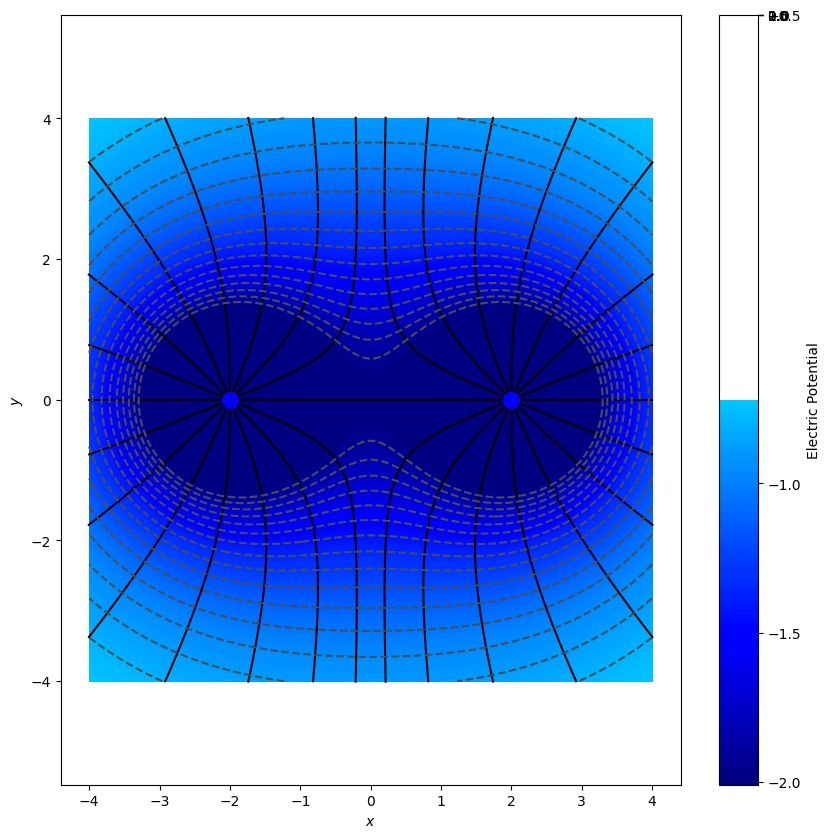

In [12]:
plt.figure(figsize=(10, 10), facecolor="w")

# plot field line
for x, y in zip(xs, ys):
    plt.plot(x, y, color="k")

# plot point charges
for C in charges:
    if C.q > 0:
        plt.plot(C.pos[0], C.pos[1], "ro", ms=8 * np.sqrt(C.q))
    if C.q < 0:
        plt.plot(C.pos[0], C.pos[1], "bo", ms=8 * np.sqrt(-C.q))

# plot electric potential
clim0, clim1 = -2, 2
vvs[np.where(vvs < clim0)] = clim0 * 0.999999  # to avoid error
vvs[np.where(vvs > clim1)] = clim1 * 0.999999  # to avoid error
plt.tricontour(xxs, yys, vvs, 15, colors="0.3")
plt.tricontourf(xxs, yys, vvs, 100, cmap=cm.jet)
cbar = plt.colorbar()
cbar.mappable.set_clim(clim0, clim1)
cbar.set_ticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
cbar.set_label("Electric Potential")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.axis("equal")
# plt.savefig("electric_force_lines_1.png", dpi=250, bbox_inches="tight", pad_inches=0.02)
plt.show()


1. [Draw electric field lines due to point charges using Python Matplotlib.pyplot](https://pythonmatplotlibtips.blogspot.com/2017/12/draw-beautiful-electric-field-lines.html?m=1)